We will now reopen the file "simulation.hdf5" and try to plot all the important parameters to try to understand what the network is doing

firstly lets, import all required libs

In [7]:
import io
from IPython.nbformat import current

def execute_notebook(nbfile):
    
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    
    ip = get_ipython()
    
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)
        
execute_notebook("common.ipynb")

Wed May 23 12:09:04 2018


We will firstly plot the neuron voltage. we will get the first 10000 points and look for the max value there, then we will take the next 10000 points and look for the minum, and keep till the end. that way we convert 1,200,000 in 112 which are displayed bellow. You can choose for different "compresion" rates (10,100,1000,10000). If you choose 1 you will be seeing the real data. But remember, when more points are shown more ram is use.

voltage has been downsampled 10 times
excitatory has been downsampled 10 times
inhibitory has been downsampled 10 times


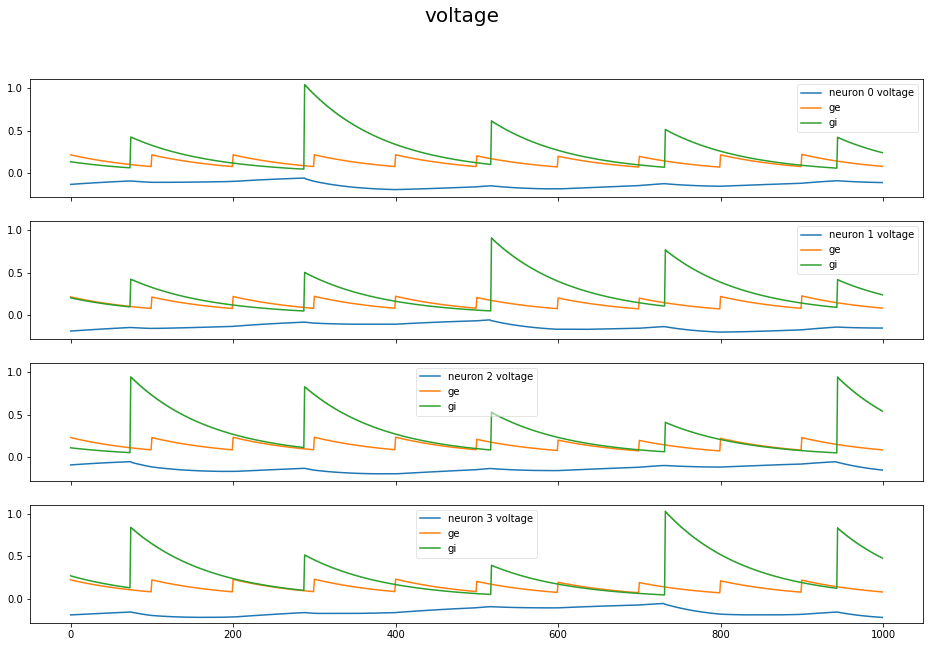

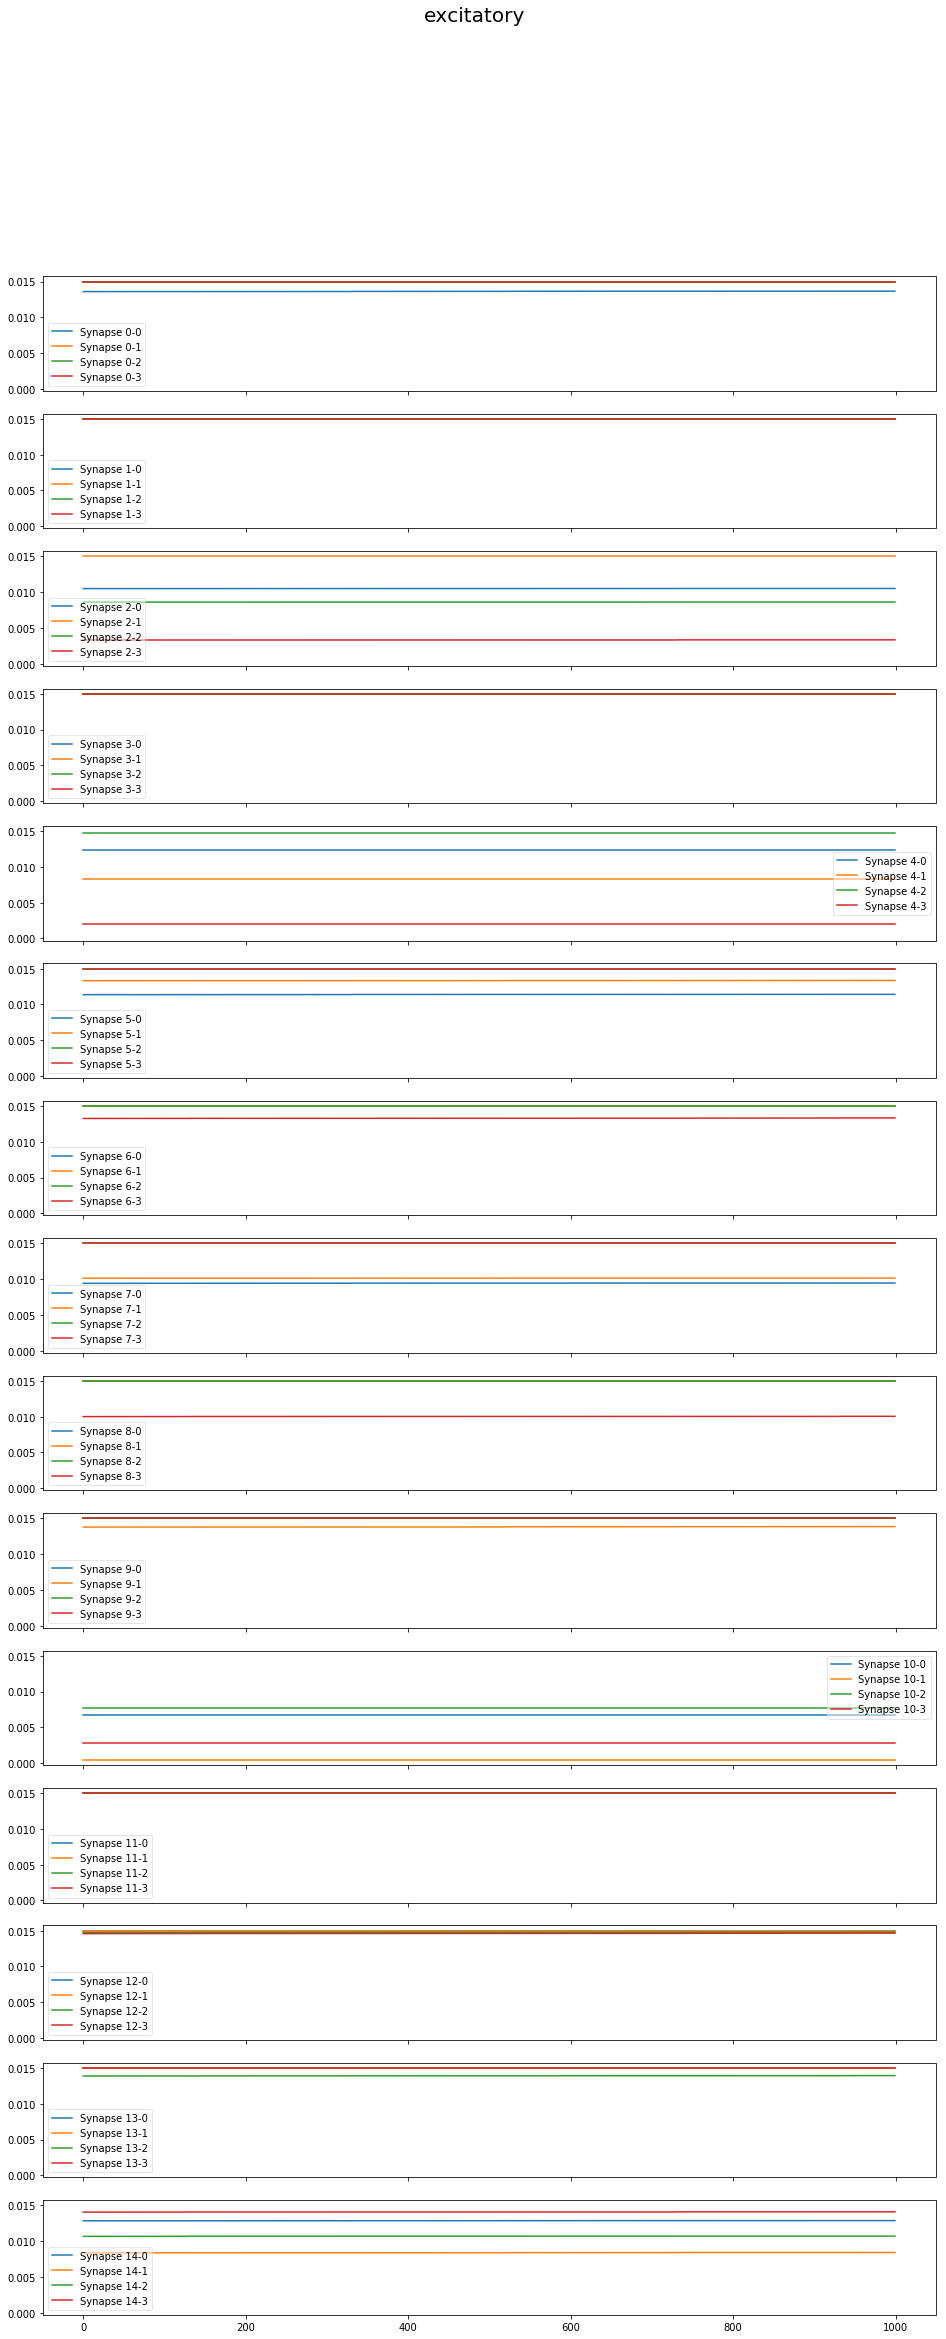

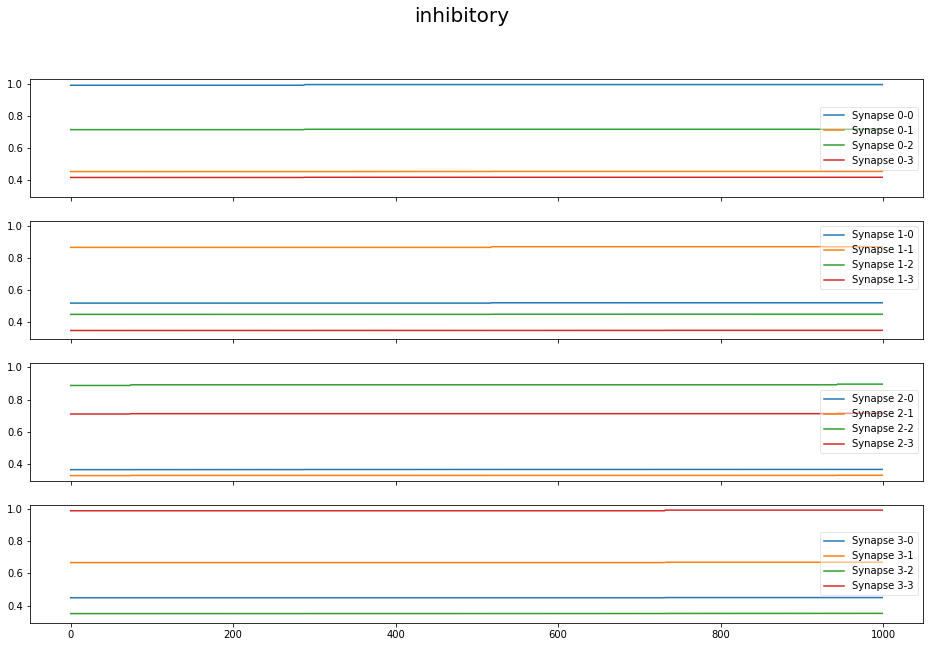

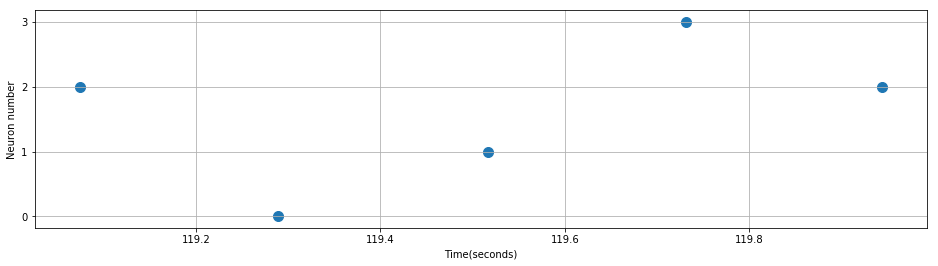

In [9]:
bp = brianPlotter('simulation.hdf5',permision = "r")

start = 119 #seconds
end = 120
bp.plotLine('voltage',start,end)
bp.plotLine('excitatory',start,end)
bp.plotLine('inhibitory',start,end)
bp.plotScatter(start,end) #downsampling not yet implemented for scatter

del bp

We can indentify some tendency among all neurons, we will now plot the weights to see if there is a correlation between this behaviour and the weights.

Firstly , we will plot excitatory weights which corresponds to the synapses that connects the first layer and the second on.
Secondly, we plot the inhibitory weights which represents the connection within neurons of the second layer, a neuron can inhibit itself in out model, so there are no weights for the diagonal.

it's interesting to notice that row 4 and 10, of the excitatory weigths remain constant, that's because then neuron 4 and 10 of the first layer never fired, because the all character have those pixels off.
